In [1]:
import pandas as pd

In [2]:
#..........................Reading a CSV file using pandas...........................

In [3]:
import requests

italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

response = requests.get(italy_covid_url, timeout=30)

with open('italy-covid-daywise.csv', 'wb') as f:
    f.write(response.content)

print("File downloaded successfully!")


File downloaded successfully!


In [4]:
covid_df=pd.read_csv('italy-covid-daywise.csv')

In [5]:
type(covid_df)

pandas.core.frame.DataFrame

In [6]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [7]:
#basic information about the dataframe using .info()
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [8]:
#number of non-empty values using .describe()
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [9]:
#property contains columns
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [10]:
#for checking number of row and columns
covid_df.shape

(248, 4)

In [11]:
# ...........................Retrieving data from a data frame..................................

In [12]:
#this how pandas store the data
covid_data_dict = {
    'date': ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02'],
    'new_cases': [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

In [13]:
covid_data_dict['new_cases']

[1444, 1365, 996, 975, 1326]

In [14]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [15]:
type(covid_df['new_cases'])

pandas.core.series.Series

In [16]:
covid_df['new_cases'][243]

np.float64(1444.0)

In [17]:
# .at method to directly retrieve at a specfic row & columns
covid_df.at[246, 'new_cases']

np.float64(975.0)

In [18]:
covid_df.at[244, 'new_deaths']

np.float64(4.0)

In [19]:
#pandas allow acessing columns as properties of the data frame using .notaion
covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [20]:
#to acess the sub set of columns
cases_df = covid_df[['date','new_cases']]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


In [21]:
#creatinf deep copy of a data frame
covid_df_copy = covid_df.copy()

In [22]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [23]:
#to access specfic row, use .loc
covid_df.loc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

In [24]:
#head first few row
covid_df.head(5)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [25]:
#tail last few row
covid_df.tail(5)

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [26]:
covid_df.at[0, 'new_tests']

np.float64(nan)

In [27]:
type(covid_df.at[0, 'new_tests'])

numpy.float64

In [28]:
#we can find the first index that doesn't contain a NaN value using first_valid_index()
covid_df.new_tests.first_valid_index()

111

In [29]:
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


In [30]:
# .sample method can be used to retrieve a random sample of rows froms the data frame
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
39,2020-02-08,0.0,0.0,NaN
130,2020-05-09,1327.0,243.0,36091.0
233,2020-08-20,642.0,7.0,49662.0
62,2020-03-02,561.0,6.0,NaN
54,2020-02-23,62.0,2.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
152,2020-05-31,416.0,111.0,28948.0
122,2020-05-01,1872.0,285.0,43732.0
240,2020-08-27,1366.0,13.0,57640.0
180,2020-06-28,175.0,8.0,21183.0


In [31]:
#..................................Analyzing Data from data frames......................................

In [32]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

In [33]:
print('The number of reported cases is:', total_cases)
print('the number of reported deaths is:', total_deaths)

The number of reported cases is: 271515.0
the number of reported deaths is: 35497.0


In [34]:
death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()

In [35]:
print("The overall reported death reate in Italy is {:.2f}%.".format(death_rate))

The overall reported death reate in Italy is 0.13%.


In [36]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()

In [37]:
total_tests

np.float64(5214766.0)

In [38]:
#what fraction of test returned a postivie result?
positive_rate = total_cases / total_tests

In [39]:
print('{:.2f}% of tests in Italy to a positive diagonsis.'.format(positive_rate))

0.05% of tests in Italy to a positive diagonsis.


In [40]:
positive_rate

np.float64(0.05206657403227681)

In [41]:
covid_df.new_cases.max()

np.float64(6557.0)

In [42]:
#maximum number of new_cases in a day
covid_df.loc[covid_df.new_cases.idxmax()]

date          2020-03-22
new_cases         6557.0
new_deaths         795.0
new_tests            NaN
Name: 82, dtype: object

In [43]:
#date for maximum cases
covid_df.date[covid_df.new_cases.idxmax()]

'2020-03-22'

In [44]:
#........................Querying and sorting rows...........................................

In [45]:
high_new_cases = covid_df.new_cases > 1000

In [46]:
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [47]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [48]:
#for reviewing the row more than 5 
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [49]:
positive_rate

np.float64(0.05206657403227681)

In [50]:
high_rate_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]

In [51]:
high_rate_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


In [52]:
#performing operations on multiple columns results in a new series
covid_df.new_cases / covid_df.new_tests

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Length: 248, dtype: float64

In [53]:
#we can use this series to a new column to the dataframe.
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

In [54]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [55]:
#for drop a column using drop method if positive is incorrect
covid_df.drop(columns=['positive_rate'], inplace=True)

In [56]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [57]:
#sorting rows using column values using .sort_values
covid_df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [58]:
covid_df.sort_values('new_deaths', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


In [59]:
covid_df.sort_values('new_cases').head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
5,2020-01-05,0.0,0.0,NaN
6,2020-01-06,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
8,2020-01-08,0.0,0.0,NaN
9,2020-01-09,0.0,0.0,NaN


In [60]:
#negative value before and after
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


In [61]:
#manupulation or replacing data which -ve(taking average)
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[172, 'new_cases'])/2

In [62]:
#............................working with dates.................................................

In [63]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [64]:
#for changing the oject datetime to columns using pd.to_datetime
covid_df['date']= pd.to_datetime(covid_df.date)

In [65]:
covid_df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [66]:
#we can extract different parts of the data into separate columns using DatatimeIndex
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [67]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [68]:
#query the row for may
covid_df_may = covid_df[covid_df.month ==5]
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [69]:
#extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]
covid_df_may_metrics

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


In [70]:
#get the column wise sum
covid_may_totals = covid_df_may_metrics.sum()

In [71]:
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [72]:
type(covid_may_totals)

pandas.core.series.Series

In [73]:
#all the 3 above in one

In [74]:
covid_df[covid_df.month==5][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [75]:
covid_df[covid_df.month==1][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases     3.0
new_deaths    0.0
new_tests     0.0
dtype: float64

In [76]:
covid_df[covid_df.month==2][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases     885.0
new_deaths     21.0
new_tests       0.0
dtype: float64

In [77]:
covid_df[covid_df.month==6][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       8011.5
new_deaths      1404.0
new_tests     830354.0
dtype: float64

In [78]:
#overall average using .mean
covid_df.new_cases.mean()

np.float64(1095.7842741935483)

In [79]:
#average for sundays
covid_df[covid_df.weekday == 6].new_cases.mean()

np.float64(1247.2571428571428)

In [80]:
covid_df[covid_df.day==4].new_cases.mean()

np.float64(892.875)

In [81]:
#........................................Grouping and aggregation...................................................

In [82]:
#to summarize the daywise data and create a new dataframe with month_wise data. using .groupby
covid_months_df = covid_df.groupby('month')[['new_cases','new_deaths','new_tests']]

In [83]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [84]:
covid_df.groupby('month')

In [85]:
monthly_groups = covid_df.groupby('month')

In [86]:
monthly_groups[['new_cases','new_deaths','new_tests']]

In [87]:
monthly_groups[['new_cases','new_deaths','new_tests']].sum()

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8011.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [88]:
covid_month_mean_df = covid_df.groupby('weekday')[['new_cases','new_deaths','new_tests']].mean()

In [89]:
covid_month_mean_df

,new_cases,new_deaths,new_tests
weekday,,,
0,1109.142857,124.800000,19826.700000
1,918.638889,129.944444,31166.900000
2,927.305556,144.750000,34665.210526
3,1095.666667,141.472222,34488.578947
4,1189.714286,144.885714,39225.684211
5,1192.642857,157.000000,34589.473684
6,1247.257143,159.457143,28588.105263


In [90]:
#to calculate the running or cumulative sum of cases, tests or death up to the currnet date for each row
#using .cumsum
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum()

In [91]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267092.5,35473.0,4182478.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268457.5,35477.0,4225061.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269453.5,35483.0,4279456.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270428.5,35491.0,NaN


In [92]:
#.........................Merging data from multiple sources.................................

In [93]:
import requests

locations_url = 'https://gist.githubusercontent.com/raun1997/9c319461d47fc2e3c6c883ca6cd84267/raw/5499273bcdbfccc33f755957129002b3d364d4b8/locations.csv'

response = requests.get(locations_url, timeout=30)

with open('locations.csv', 'wb') as f:
    f.write(response.content)

In [94]:
locations_df = pd.read_csv('locations.csv')

In [95]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [96]:
locations_df[locations_df.location== "Italy"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [97]:
#adding new coloumns
covid_df['location'] = "Italy"

In [98]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267092.5,35473.0,4182478.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268457.5,35477.0,4225061.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269453.5,35483.0,4279456.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270428.5,35491.0,NaN,Italy


In [99]:
#for merging one columns should be same using .merge()
merged_df = covid_df.merge(locations_df, on="location")

In [100]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267092.5,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268457.5,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269453.5,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270428.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [101]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population

In [102]:
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population

In [103]:
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [104]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267092.5,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4417.539278,586.700753,69175.513516
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268457.5,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4440.115506,586.766910,69879.809125
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269453.5,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4456.588709,586.866146,70779.467667
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270428.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4472.714586,586.998461,NaN


In [105]:
#.................................writing data backs to files...............................

In [106]:
result_df = merged_df[['date',
                      'new_cases',
                      'total_cases',
                      'new_deaths',
                      'total_deaths',
                      'new_tests',
                      'total_deaths',
                      'cases_per_million',
                      'deaths_per_million',
                      'tests_per_million']]

In [107]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_deaths,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,0.0,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,0.0,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,0.0,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,0.0,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,0.0,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267092.5,1.0,35473.0,53541.0,35473.0,4417.539278,586.700753,69175.513516
244,2020-08-31,1365.0,268457.5,4.0,35477.0,42583.0,35477.0,4440.115506,586.766910,69879.809125
245,2020-09-01,996.0,269453.5,6.0,35483.0,54395.0,35483.0,4456.588709,586.866146,70779.467667
246,2020-09-02,975.0,270428.5,8.0,35491.0,NaN,35491.0,4472.714586,586.998461,NaN


In [108]:
#to write data from the dataframe into a file we use to_csv
result_df.to_csv('results.csv', index=None) #for not choosing index value

In [109]:
#......................................Basic plotting with pandas.............................

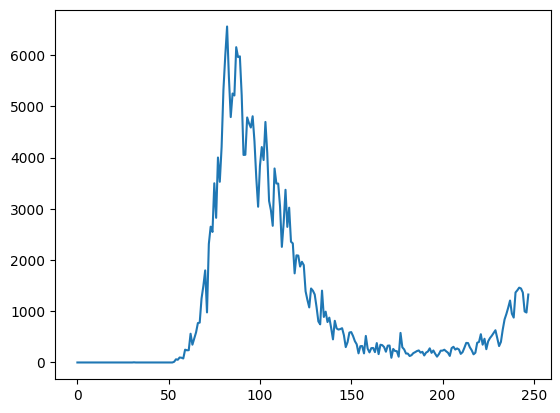

In [110]:
#we typically use matplotlib or seaborn but pandas also provide some handy method using .plot
result_df.new_cases.plot();

In [111]:
result_df.set_index('date', inplace = True)

In [112]:
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_deaths,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,0.0,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,0.0,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,0.0,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,0.0,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,0.0,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,267092.5,1.0,35473.0,53541.0,35473.0,4417.539278,586.700753,69175.513516
2020-08-31,1365.0,268457.5,4.0,35477.0,42583.0,35477.0,4440.115506,586.766910,69879.809125
2020-09-01,996.0,269453.5,6.0,35483.0,54395.0,35483.0,4456.588709,586.866146,70779.467667


In [113]:
result_df.loc['2020-09-02']

new_cases                975.000000
total_cases           270428.500000
new_deaths                 8.000000
total_deaths           35491.000000
new_tests                       NaN
total_deaths           35491.000000
cases_per_million       4472.714586
deaths_per_million       586.998461
tests_per_million               NaN
Name: 2020-09-02 00:00:00, dtype: float64

In [114]:
result_df.new_cases

date
2019-12-31       0.0
2020-01-01       0.0
2020-01-02       0.0
2020-01-03       0.0
2020-01-04       0.0
               ...  
2020-08-30    1444.0
2020-08-31    1365.0
2020-09-01     996.0
2020-09-02     975.0
2020-09-03    1326.0
Name: new_cases, Length: 248, dtype: float64

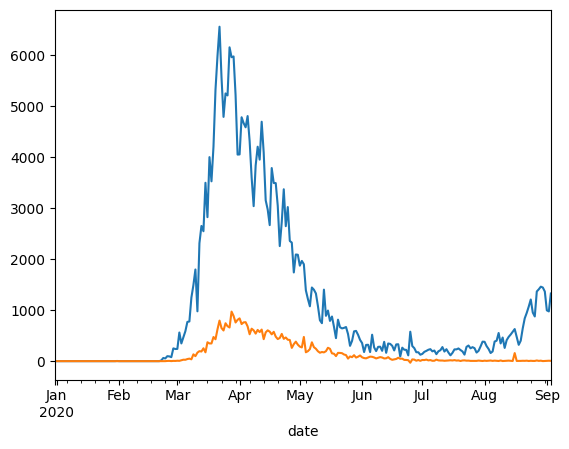

In [116]:
result_df.new_cases.plot()
result_df.new_deaths.plot();

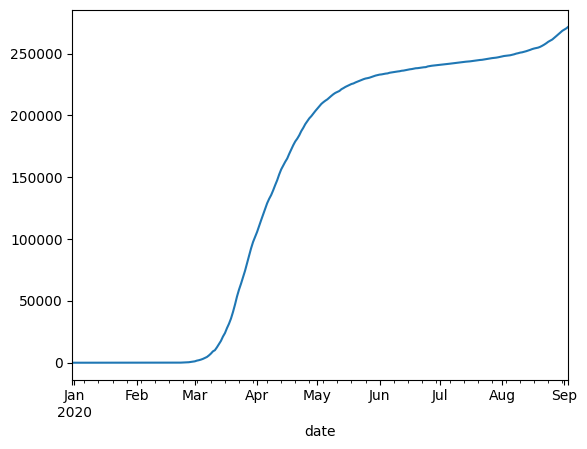

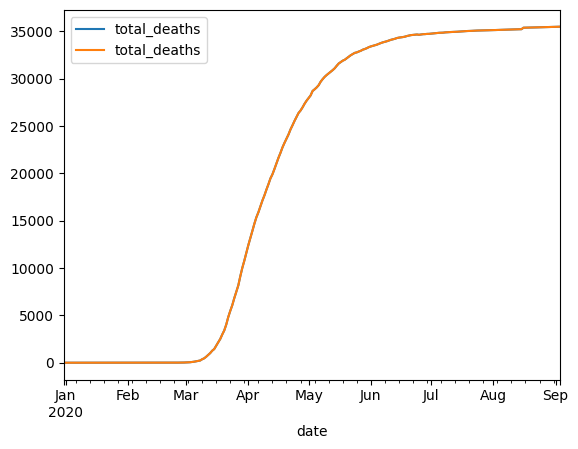

In [119]:
result_df.total_cases.plot()
result_df.total_deaths.plot();